In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('iris')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
std = data.std()

In [5]:
mean = data.mean()

In [6]:
def gaussmf(x, mean, sigma):

    return np.exp(-((x - mean)**2.) / (2 * sigma**2.))

In [7]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [8]:
mean_sepal_length = mean['sepal_length']
mean_sepal_width = mean['sepal_width']
mean_petal_length = mean['petal_length']
mean_petal_width = mean['petal_width']

In [9]:
std_sepal_length = std['sepal_length']
std_sepal_width = std['sepal_width']
std_petal_length = std['petal_length']
std_petal_width = std['petal_width']

In [10]:
def sepal_length_s(x):
    return gaussmf(x, mean_sepal_length - std_sepal_length, std_sepal_length)

def sepal_length_m(x):
    return gaussmf(x, mean_sepal_length, std_sepal_length)

def sepal_length_l(x):
    return gaussmf(x, mean_sepal_length + std_sepal_length, std_sepal_length)

In [11]:
def sepal_width_s(x):
    return gaussmf(x, mean_sepal_width - std_sepal_width, std_sepal_width)

def sepal_width_m(x):
    return gaussmf(x, mean_sepal_width, std_sepal_width)

def sepal_width_l(x):
    return gaussmf(x, mean_sepal_width + std_sepal_width, std_sepal_width)

In [12]:
def petal_length_s(x):
    return gaussmf(x, mean_petal_length - std_petal_length, std_petal_length)

def petal_length_m(x):
    return gaussmf(x, mean_petal_length, std_petal_length)

def petal_length_l(x):
    return gaussmf(x, mean_petal_length + std_petal_length, std_petal_length)

In [13]:
def petal_width_s(x):
    return gaussmf(x, mean_petal_width - std_petal_width, std_petal_width)

def petal_width_m(x):
    return gaussmf(x, mean_petal_width, std_petal_width)

def petal_width_l(x):
    return gaussmf(x, mean_petal_width + std_petal_width, std_petal_width)

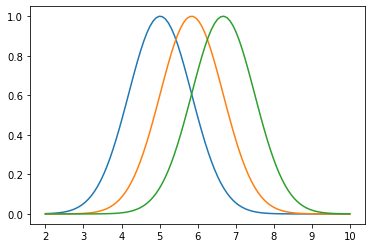

In [14]:
x = np.linspace(2,10,100)
plt.plot(x,sepal_length_s(x))
plt.plot(x,sepal_length_m(x))
plt.plot(x,sepal_length_l(x))
plt.show()

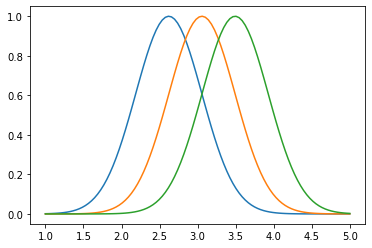

In [15]:
x = np.linspace(1,5,100)
plt.plot(x,sepal_width_s(x))
plt.plot(x,sepal_width_m(x))
plt.plot(x,sepal_width_l(x))
plt.show()

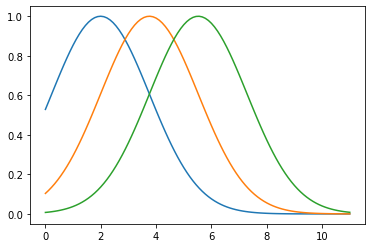

In [16]:
x = np.linspace(0,11,100)
plt.plot(x,petal_length_s(x))
plt.plot(x,petal_length_m(x))
plt.plot(x,petal_length_l(x))
plt.show()

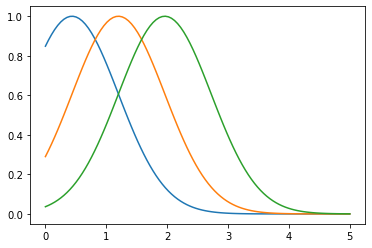

In [17]:
x = np.linspace(0,5,100)
plt.plot(x,petal_width_s(x))
plt.plot(x,petal_width_m(x))
plt.plot(x,petal_width_l(x))
plt.show()

In [18]:
mf = {'ls1' : data.sepal_length.map(lambda x: sepal_length_s(x)),
'lm1' : data.sepal_length.map(lambda x: sepal_length_m(x)),
'll1' : data.sepal_length.map(lambda x: sepal_length_l(x)),

'ls2' : data.sepal_width.map(lambda x: sepal_width_s(x)),
'lm2' : data.sepal_width.map(lambda x: sepal_width_m(x)),
'll2' : data.sepal_width.map(lambda x: sepal_width_l(x)),

'ls3' : data.petal_length.map(lambda x: petal_length_s(x)),
'lm3' : data.petal_length.map(lambda x: petal_length_m(x)),
'll3' : data.petal_length.map(lambda x: petal_length_l(x)),

'ls4' : data.petal_width.map(lambda x: petal_width_s(x)),
'lm4' : data.petal_width.map(lambda x: petal_width_m(x)),
'll4' : data.petal_width.map(lambda x: petal_width_l(x))}

In [19]:
X = pd.DataFrame(mf)

In [20]:
Y =  pd.get_dummies(data.species)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
#T function
def T(x,L1,L2,cn):
    r = x - np.dot(L1,x) + L2
    s = np.abs(r)-cn
    s = np.maximum(s,0,s)
    return s*np.sign(r)

def thetan(x0,x1,n):
    if (x0==x1).all():
        return 0
    else:
        return 1/(2**n*np.linalg.norm(x1-x0,'fro'))

In [23]:
# H = self._activation(X.dot(self._w) + self._bias)
H = X_train
itrs = 100
L = 1. / np.max(np.linalg.eigvals(np.dot(H.T, H))).real
m = H.shape[1]
n = y_train.shape[1]
x0 = np.zeros((m,n))
x1 = np.zeros((m,n))
L1 = 2*L*np.dot(H.T, H)
L2 = 2*L*np.dot(H.T, y_train)
lam=1e-1
for i in range(1,itrs+1):
    cn = ((2e-6*i)/(2*i+1))*lam*L
    beta = 0.9*i/(i+1)
    alpha = 0.9*i/(i+1)

    y = x1 + thetan(x0,x1,i)*(x1-x0)
    z = (1-beta)*x1 + beta*T(x1,L1,L2,cn)

    Ty = T(y,L1,L2,cn)
    Tz = T(z,L1,L2,cn)
    x = (1-alpha)*Ty + alpha*Tz

    x0, x1 = x1, x

In [24]:
W = x

In [25]:
predict = X_test.dot(W).values

In [26]:
actual  = y_test.values

In [27]:
np.sum(np.argmax(X_test.dot(W).values, axis=1) == np.argmax(actual, axis=1)) / y_test.shape[0]

0.9777777777777777